# Prénoms de 1900 à 2019

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import os
import zipfile

## Acquisition des données

In [2]:
def get_data():
    url = "https://www.insee.fr/fr/statistiques/fichier/2540004/dpt2020_csv.zip"
    zipfile_name = "data.zip"
    
    # downloading the zip file
    os.system(f"curl -s {url} > {zipfile_name}")
    
    # unzip the file
    with zipfile.ZipFile(zipfile_name, 'r') as zipf:
        zipf.extractall()

    csv_name = [f for f in os.listdir() if f.endswith('csv')][0]

    data = pd.read_csv(csv_name, sep=';')
    os.remove(csv_name) # delete the csv file
    os.remove(zipfile_name) # delete the zip file
    data = data.dropna() # remove line with NaN value
    data = data[~data.preusuel.str.startswith('_')] #remove names starting with underscore
    data = data[~data.annais.str.startswith('X')] # remove birth years starting with X
    return data

In [3]:
data = get_data()

In [4]:
data

,sexe,preusuel,annais,dpt,nombre
10885,1,AADIL,1983,84,3
10886,1,AADIL,1992,92,3
10888,1,AAHIL,2016,95,3
10892,1,AARON,1962,75,3
10893,1,AARON,1976,75,3
...,...,...,...,...,...
3727545,2,ZYA,2013,44,4
3727546,2,ZYA,2013,59,3
3727547,2,ZYA,2017,974,3
3727548,2,ZYA,2018,59,3


## Prénoms les plus donnés par tranche d'années et par sexe

In [17]:
def get_most_frequent(data, gender, number, year_from=1900, year_to=2020):
    
    if gender not in range(1,3):
        print('gender doit être 1 pour masculin, ou 2 pour féminin')
        return None
    year_from = str(year_from)
    year_to = str(year_to)
    
    return data[(data.sexe == gender) & (data.annais >= year_from) & (data.annais <= year_to)].groupby('preusuel')[['nombre']].sum().sort_values('nombre', ascending=False).head(number)

In [18]:
get_most_frequent(data, 1, 10, 1981)

,nombre
preusuel,
NICOLAS,247755
THOMAS,243511
JULIEN,235116
ALEXANDRE,213464
MAXIME,192322
LUCAS,174122
ROMAIN,169987
ANTOINE,152989
GUILLAUME,151426


In [19]:
get_most_frequent(data, 2, 10, 1990, 1995)

,nombre
preusuel,
LAURA,45771
MARINE,42544
MARIE,42434
CAMILLE,38271
JULIE,37091
MARION,35944
PAULINE,35182
ELODIE,35162
ANAÏS,33706


## Prénoms les plus données, histogramme édition

In [20]:
def plot_most_popular_names(data, gender, number, year_from=1900, year_to=2020):

    fig, ax = plt.subplots(figsize=(20,8))
    ax.set_xlabel('Année')
    ax.set_ylabel('Nombre d’enfants avec le prénom')
    
    if gender not in range(1,3):
        print('gender doit être 1 pour masculin, ou 2 pour féminin')
        return None
    year_from = str(year_from)
    year_to = str(year_to)
    

    for prenom in get_most_frequent(data, gender, number, year_from, year_to).index: # on récupère les number prénoms les plus populaires sur la période
        name_df = data[(data.preusuel == prenom) & (data.annais >= year_from) & (data.annais <= year_to)].groupby('annais').sum()[['nombre']] # on sélection le prénom, groupe par année, et somme la colonne nombre
        name_df.columns = [prenom.capitalize()] # on change le nom de la colonne nombre, qui deviendra le libellé de la courbe
        name_df.plot(ax = ax) # on trace la courbe du prénom

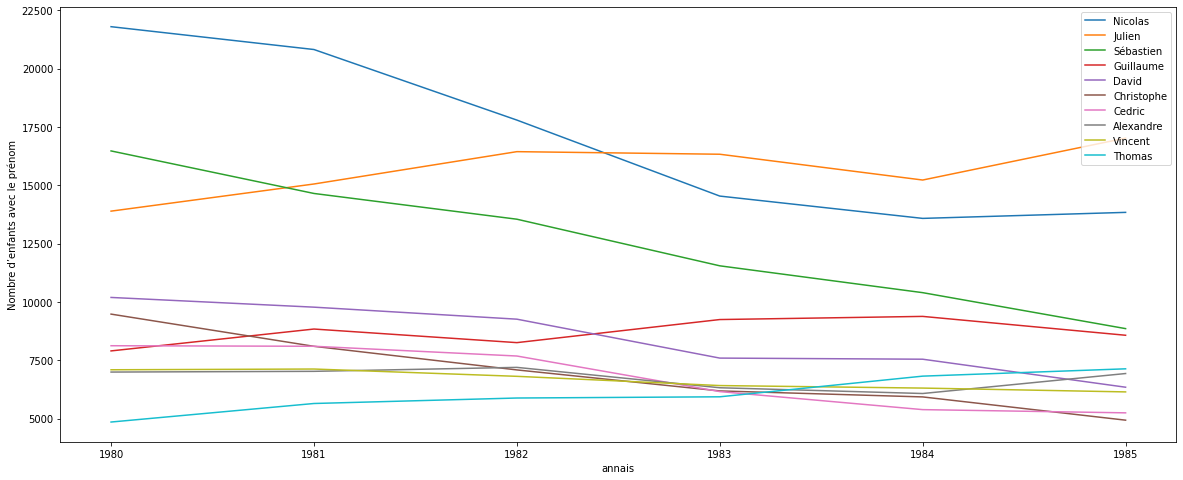

In [22]:
plot_most_popular_names(data, gender=1, number=10, year_from=1980, year_to=1985)

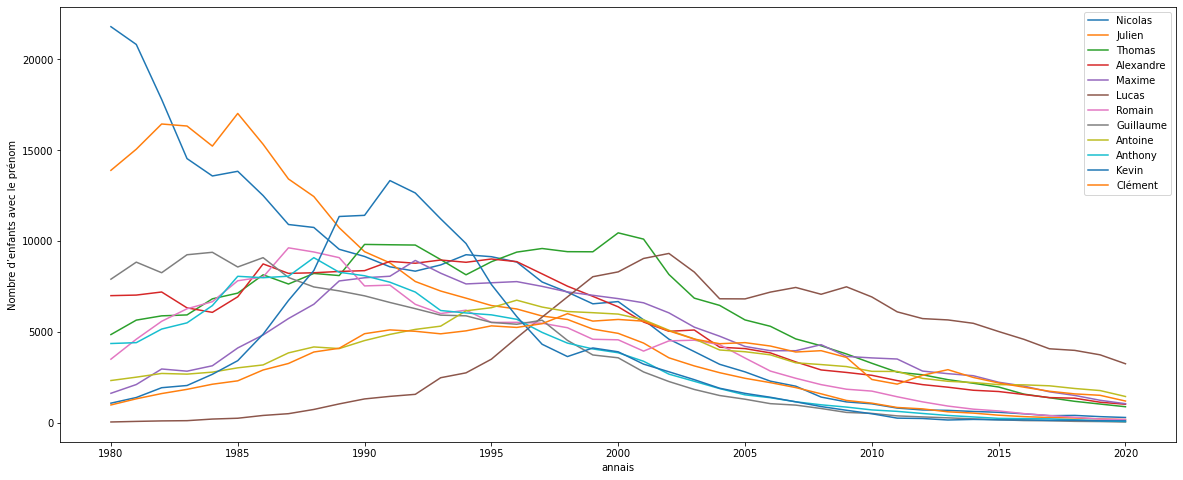

In [118]:
plot_most_popular_names(data, gender=1, number=12, year_from=1980, year_to=2020)

<AxesSubplot:xlabel='annais'>

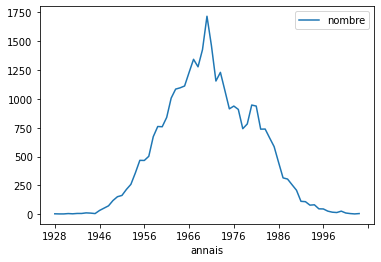

In [10]:
data[data.preusuel=='MARIE-LAURE'].groupby('annais').sum()[['nombre']].plot()

<AxesSubplot:xlabel='annais'>

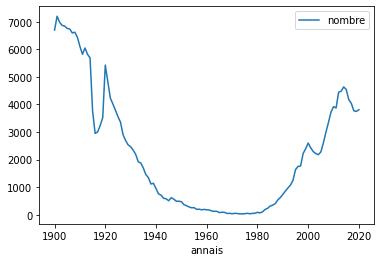

In [51]:
data[data.preusuel=='LOUISE'].groupby('annais').sum()[['nombre']].plot()

In [42]:
(data.preusuel == 'PALAMÈDE').sum()

0